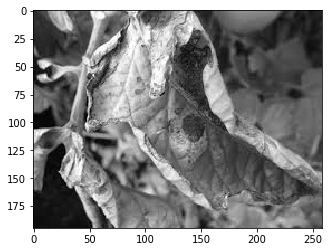

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = r"C:\Users\LENOVO\Desktop\fd"
CATEGORIES = ["Blight","Septoria leaf spot"]

for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_arry=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arry,cmap="gray")
        plt.show()
        break
    break
        


In [70]:
print (img_arry.shape)

(195, 259)


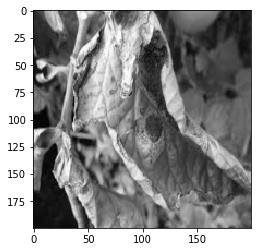

In [71]:
IMG_SIZE=200
new_array=cv2.resize(img_arry,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap ='gray')
plt.show()

In [72]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_arry=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_arry,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
        

In [73]:
print(len(training_data))

21


In [74]:
import random

random.shuffle(training_data)

In [75]:
for sample in training_data:
    print(sample[1])

1
1
1
0
0
1
1
1
1
0
1
0
0
0
0
1
1
1
0
1
0


In [76]:
x=[]
y=[]

In [77]:
for features,label in training_data:
    x.append(features)
    y.append(label)
    
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [78]:
import pickle

pickle_out=open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [79]:
pickle_in=open("x.pickle","rb")
X=pickle.load(pickle_in)